In [1]:
import add_to_syspath
from audiomnist.io.read_dataset import load_alexnet_dataset
from audiomnist.models.autoencoder_spectrogram import build_model
from audiomnist.train.autoencoder_spectrogram import get_epoch_checkpoint
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.enable_eager_execution()

In [3]:
dataset = load_alexnet_dataset("../tf_data/spectrogram.tfrecords")

In [4]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 227, 227, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 114, 114, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 114, 114, 16)      4624      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 57, 57, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 57, 57, 8)         1160      
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 29, 29, 8)         0         
_________________________________________________________________
conv

In [85]:
ckpt = get_epoch_checkpoint("../models/autoencoder_spectrogram", 50)
model.load_weights(ckpt)

../models/autoencoder_spectrogram/model.50-*.data*
['../models/autoencoder_spectrogram/model.50- 16.69.data-00000-of-00001']


In [18]:
iterator = iter(dataset)

In [66]:
image = next(iterator)

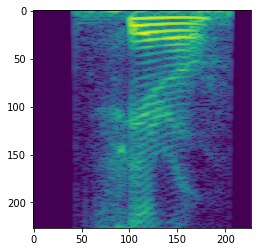

In [67]:
plt.imshow(np.array(image['data']).reshape((227,227)))

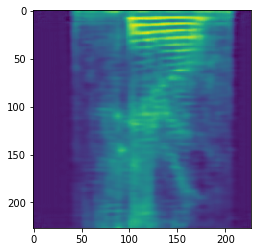

In [86]:
image_encoded = model.predict(np.array(image['data']).reshape((1,227,227,1)))
plt.imshow(image_encoded.reshape((227,227)))

In [35]:
print(image_encoded)

[[[[-72.369255]
   [-79.51237 ]
   [-80.994705]
   ...
   [-53.924732]
   [-53.352657]
   [-49.297707]]

  [[-79.16486 ]
   [-80.733894]
   [-82.75724 ]
   ...
   [-54.69592 ]
   [-54.6547  ]
   [-51.119778]]

  [[-82.39743 ]
   [-78.18179 ]
   [-79.99634 ]
   ...
   [-54.541866]
   [-54.74925 ]
   [-51.831306]]

  ...

  [[-80.97979 ]
   [-83.14041 ]
   [-82.13213 ]
   ...
   [-75.005135]
   [-76.54792 ]
   [-76.784355]]

  [[-76.53767 ]
   [-80.67526 ]
   [-80.024994]
   ...
   [-75.068504]
   [-73.926674]
   [-72.58608 ]]

  [[-70.54485 ]
   [-78.27021 ]
   [-77.03045 ]
   ...
   [-75.31933 ]
   [-72.6675  ]
   [-70.9161  ]]]]
